<a href="https://colab.research.google.com/github/aimlfacnwu/MSDS_458_Fall2022/blob/MSDS_458_Spring2022/Tensor_Keras_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf


***Current version of Keras is 3.0.
- 2024SP_MSDS_458 session is based on Keras 2.0. For forcing install and using Keras 2.x ensure TensorFlow version <= 2.15. ***


In [ ]:
print(tf.__version__)

2.15.0


*Operations* on tensors :

---


*  tf.multiply,tf.mathmul,tf.min,tf.argmax etc
*  [:] slicing,tf.concat,@,+,-
*  tf.size(),ndim,shape






In [4]:
rank_4_tensor = tf.zeros([3,6,4,5])
print(f"rank_4_tensor size of elements:{tf.size(rank_4_tensor)}")
print(f"Type of rank_4:{rank_4_tensor.dtype}")
print(f"Dimensions of rank_4_tensor:{rank_4_tensor.ndim}")
print(f"Number of elements along axis 0:{rank_4_tensor.shape[0]} ")
print(f"Number of elements along axis 0:{rank_4_tensor.shape} ")

rank_4_tensor size of elements:360
Type of rank_4:<dtype: 'float32'>
Dimensions of rank_4_tensor:4
Number of elements along axis 0:3 
Number of elements along axis 0:(3, 6, 4, 5) 


# **# Simple Example: Machinelearning**
The task in this Codelab is to create a model that can give the value of Y when given X,

> X = –1, 0, 1, 2, 3, 4

> Y = –3, –1, 1, 3, 5, 7

Looking at the data, we can derive that Y = 2x + 1.

Let us use this example of X data and Y labels to see how to build a neural network model to determine the model for this.  We create two lists xs and ys that we can use to train our model.

Steps are:

1.   Import Keras and required libraries
2.   **Set up training data**
Machine Learning is all about figuring out an algorithm given a set of inputs and outputs.
---



In [5]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

for i,c in enumerate(xs):
  print(f"{i}. {c} in X corresponds to Y = {ys[i]}")

0. -1.0 in X corresponds to Y = -3.0
1. 0.0 in X corresponds to Y = -1.0
2. 1.0 in X corresponds to Y = 1.0
3. 2.0 in X corresponds to Y = 3.0
4. 3.0 in X corresponds to Y = 5.0
5. 4.0 in X corresponds to Y = 7.0


### Machine Learning Terminology
- **Feature** — The input(s) to the model. In this case, a single value of X from xs.

- **Labels** — The output our model predicts. In this case, a single value of Y.

- **Example** — A pair of inputs/outputs used during training. In our case a pair of values from xs and ys at a specific index, such as (0.0,-1.0).

## Create the model

Next, create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing Y. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)
*  `Dense` -  which is basically a fully connected neuron layer.

In [6]:
l0 = Dense(units=1, input_shape=[1])

### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [7]:
model = Sequential(l0)

**Note**

You will often see the layers defined inside the model definition, rather than beforehand:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.

In [8]:
model.compile(optimizer='sgd', loss='mean_squared_error')

These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting the value of X  to the corresponding Y.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function ([mean squared error](https://keras.io/2.16/api/losses/regression_losses/#meansquarederror-class)) and the optimizer stochastic gradient descent([sgd](https://keras.io/2.16/api/optimizers/sgd/)) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

## Train the model

Train the model by calling the `fit` method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [9]:
history = model.fit(xs, ys, epochs=500)
print("---------Finished training the model------------------")

Epoch 1/500
1/1 [==============================] - 1s 554ms/step - loss: 24.9279
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 19.9021
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 15.9420
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 12.8206
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 10.3591
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 8.4170
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 6.8835
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 5.6716
Epoch 9/500
1/1 [==============================] - 0s 13ms/step - loss: 4.7129
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 3.9535
Epoch 11/500
1/1 [==============================] - 0s 14ms/step - loss: 3.3510
Epoch 12/500
1/1 [==============================] - 0s 11ms/step - loss: 2.8721
Epoch 13/500
1/1 [=============================

## Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the value of Y the model predicts is far from the corresponding value in `ys`.

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.


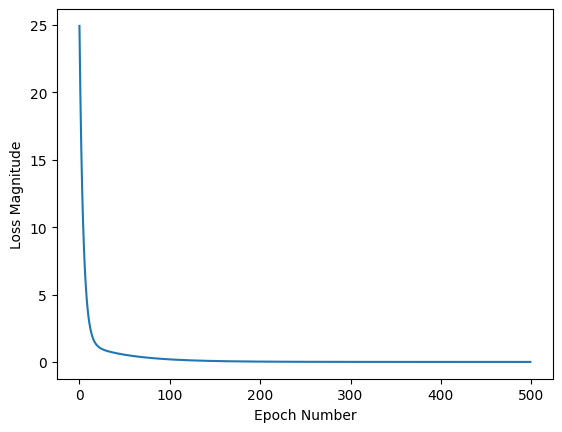

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values

Now you have a model that has been trained to learn the relationship between `X` and `Y`. You can use the predict method to have it calculate the value for Y for a previously unknown X.

So, for example, if the X value is 10.0, what do you think the value for Y will be? Take a guess before you run this code.

In [12]:
print(f"\n\nPredicted value of ys for xs=10:{model.predict([10.0])}")
print(f"Weights:{l0.get_weights()}")

1/1 [==============================] - 0s 57ms/step


Predicted value of ys for xs=10:[[18.979824]]
Weights:[array([[1.9970757]], dtype=float32), array([-0.9909333], dtype=float32)]


**Thus, the learned relationship as per the model, between X and Y was Y = 1.9970757X – 0.9909333.

The correct answer is $10 \times 2 - 1 = 19$, so our model is doing really well.

### To review


*   We created a model with a Dense layer
*   We trained it with examples over 500 epochs.

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Y value for any X value. (Remember, 10.0  was not part of our xs training data.)


This is pretty close to what we’d expect (Y = 2X – 1)**

## Why is the predicted value **converges** but is not exactly 19?
The model picks a value very close to 19. There are several reasons for this.
- First of all, our loss wasn’t 0. It was still a very small amount, so we should expect any predicted answer to be off by a very small amount.
- Secondly, the neural network is trained on only a small amount of data—in this case only six pairs of (X,Y) values.